In [1]:
import random
import numpy as np

In [2]:
#Basic Monte carlo 1 

def random_walk(steps):
    x_initial, y_initial = 0, 0
    random_walk_set = set(((x_initial, y_initial),))
    random_walk_list = list(((x_initial, y_initial),))
    x_new, y_new = x_initial, y_initial

    moves = [(0,1), (0, -1), (1, 0), (-1,0)]
    
    move_nums = np.random.choice(len(moves), size = steps)
    for i in move_nums:
        x_new += moves[i][0]
        y_new += moves[i][1] 
        
        random_walk_set.add((x_new, y_new))
        random_walk_list.append((x_new, y_new))
    return random_walk_set, random_walk_list

In [3]:
def self_avoiding_walks_proportion(L, N):
    self_avoiding_walks = 0
    for i in range(N):
        walk_set, walk_list = random_walk(L)
        if len(walk_set) == len(walk_list): 
            self_avoiding_walks += 1
    
    p_hat = self_avoiding_walks / N 
    var_p_hat = (p_hat * (1 - p_hat)) / N
    std_error = np.sqrt(var_p_hat)
    
    return p_hat, var_p_hat, std_error

In [4]:
for i in range(15):
    p_hat, var_p_hat, std_error = self_avoiding_walks_proportion(i+1, 100000)
    relative_error = std_error / p_hat if p_hat != 0 else float('inf') 
    print(f"Steps: {i+1}")
    print(f"Proportion of SAWs: {p_hat}")
    print(f"Relative Error: {relative_error}\n")

Steps: 1
Proportion of SAWs: 1.0
Relative Error: 0.0

Steps: 2
Proportion of SAWs: 0.75156
Relative Error: 0.001818146739291659

Steps: 3
Proportion of SAWs: 0.56006
Relative Error: 0.0028027182870933504

Steps: 4
Proportion of SAWs: 0.39272
Relative Error: 0.00393235737288035

Steps: 5
Proportion of SAWs: 0.27897
Relative Error: 0.005083910732041013

Steps: 6
Proportion of SAWs: 0.18952
Relative Error: 0.006539486195113061

Steps: 7
Proportion of SAWs: 0.13208
Relative Error: 0.008106274723010455

Steps: 8
Proportion of SAWs: 0.09099
Relative Error: 0.009995108156169314

Steps: 9
Proportion of SAWs: 0.0626
Relative Error: 0.012237009804101936

Steps: 10
Proportion of SAWs: 0.04258
Relative Error: 0.014995067296040252

Steps: 11
Proportion of SAWs: 0.0296
Relative Error: 0.01810629276903027

Steps: 12
Proportion of SAWs: 0.01901
Relative Error: 0.022716490197224333

Steps: 13
Proportion of SAWs: 0.01292
Relative Error: 0.027640437913490728

Steps: 14
Proportion of SAWs: 0.00845
Relativ

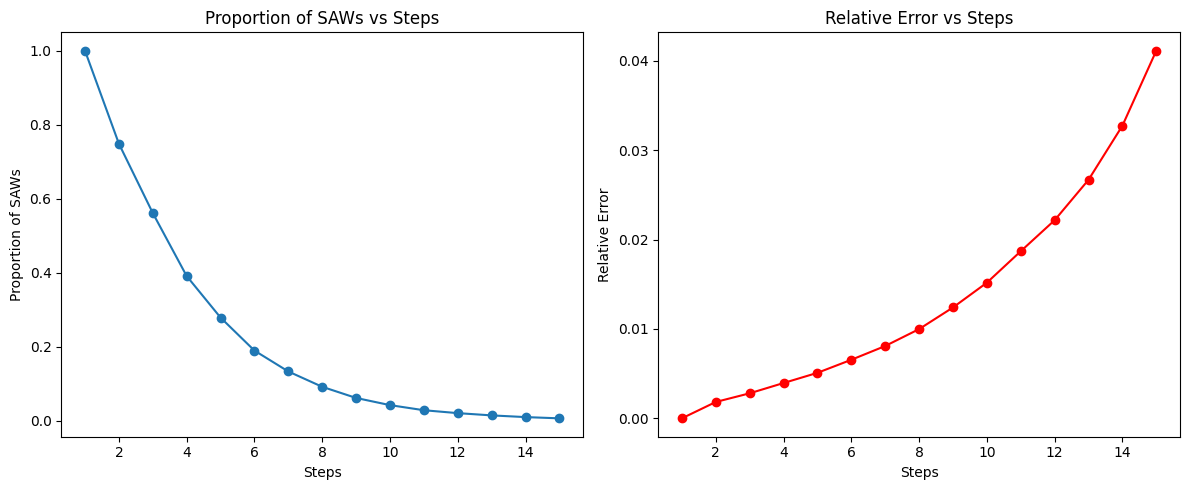

In [5]:
import matplotlib.pyplot as plt

steps = list(range(1, 16))
proportions = [1.0, 0.7486, 0.56112, 0.39069, 0.27837, 0.18912, 0.13261, 0.09118,
               0.06102, 0.04162, 0.02783, 0.01996, 0.01385, 0.00925, 0.00588]
relative_errors = [0.0, 0.00183, 0.00280, 0.00395, 0.00509, 0.00655, 0.00809, 0.00998,
                   0.01240, 0.01517, 0.01869, 0.02216, 0.02668, 0.03273, 0.04112]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(steps, proportions, marker='o')
plt.title("Proportion of SAWs vs Steps")
plt.xlabel("Steps")
plt.ylabel("Proportion of SAWs")

plt.subplot(1, 2, 2)
plt.plot(steps, relative_errors, marker='o', color='red')
plt.title("Relative Error vs Steps")
plt.xlabel("Steps")
plt.ylabel("Relative Error")

plt.tight_layout()
plt.show()
